<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Supervised%20Learning/Student_Score_Predictor_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount("/content/data")

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [ ]:
#Load our model
path = "/content/data/MyDrive/datasets/student_score.csv"
students = pd.read_csv(path)
students.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [ ]:
students.shape

(708, 10)

In [ ]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


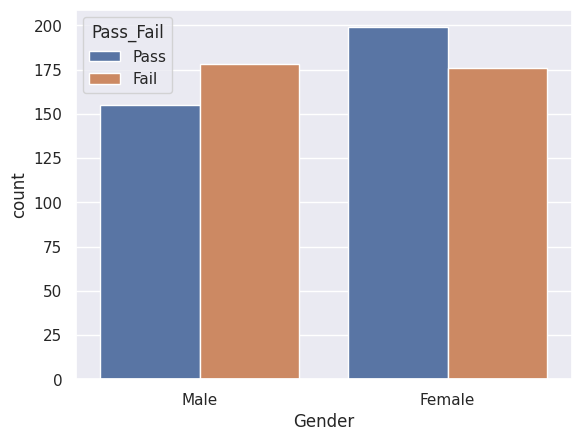

In [ ]:
#Data Visualizing
sns.set()
sns.countplot(x="Gender", hue="Pass_Fail", data=students)
plt.show()

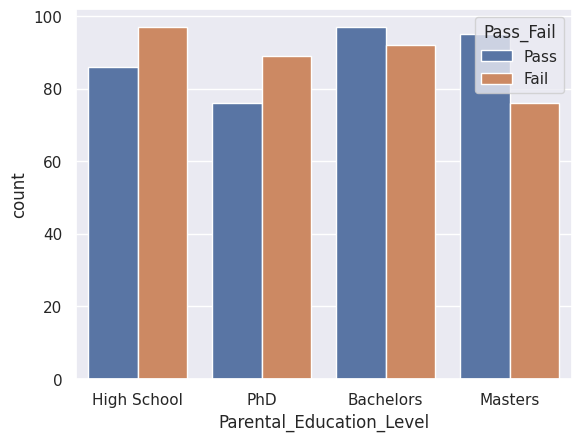

In [ ]:
sns.countplot(x="Parental_Education_Level", hue="Pass_Fail", data=students)
plt.show()

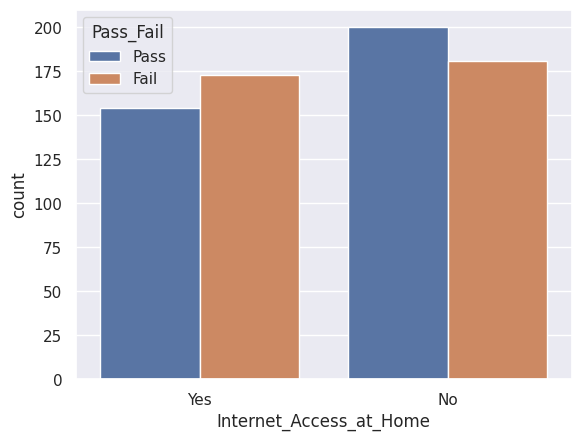

In [ ]:
sns.countplot(x="Internet_Access_at_Home", hue="Pass_Fail", data=students)
plt.show()

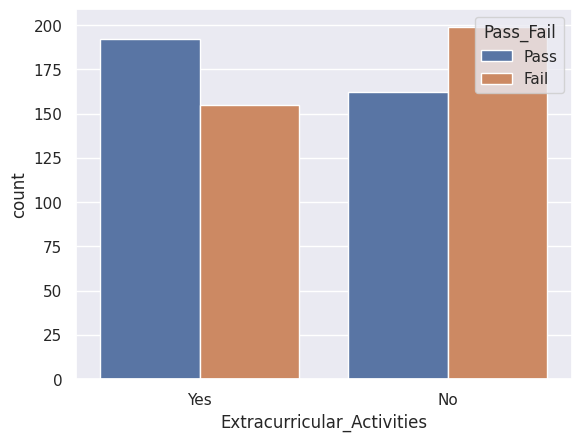

In [ ]:
sns.countplot(x="Extracurricular_Activities", hue="Pass_Fail", data=students)
plt.show()

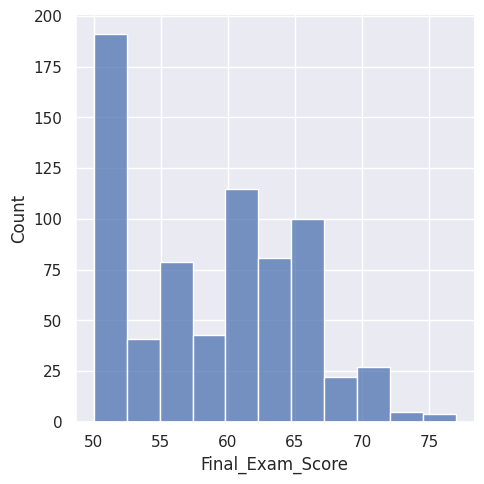

In [ ]:
sns.displot(students["Final_Exam_Score"])
plt.show()

In [ ]:
#Perform some Encoding
#Replace Categorical Values
#With Numerical Values

students.replace({
"Internet_Access_at_Home":{"Yes":1, "No":0},
"Gender": {"Male":1, "Female":0},
"Parental_Education_Level": {"High School": 0, "PhD":1, "Bachelors":2, "Masters":3},
"Extracurricular_Activities": {"Yes":1, "No":0},
"Pass_Fail": {"Pass":1, "Fail":0}
},
inplace=True
)

/tmp/ipython-input-2513391407.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  students.replace({


In [ ]:
students.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,1,31,68.267841,86,0,1,1,63,1
1,S136,1,16,78.222927,73,1,0,0,50,0
2,S209,0,21,87.525096,74,1,1,0,55,0
3,S458,0,27,92.076483,99,2,0,0,65,1
4,S078,0,37,98.655517,63,3,0,1,70,1


In [ ]:
students = students.iloc[:, 1:]
students.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,1,31,68.267841,86,0,1,1,63,1
1,1,16,78.222927,73,1,0,0,50,0
2,0,21,87.525096,74,1,1,0,55,0
3,0,27,92.076483,99,2,0,0,65,1
4,0,37,98.655517,63,3,0,1,70,1


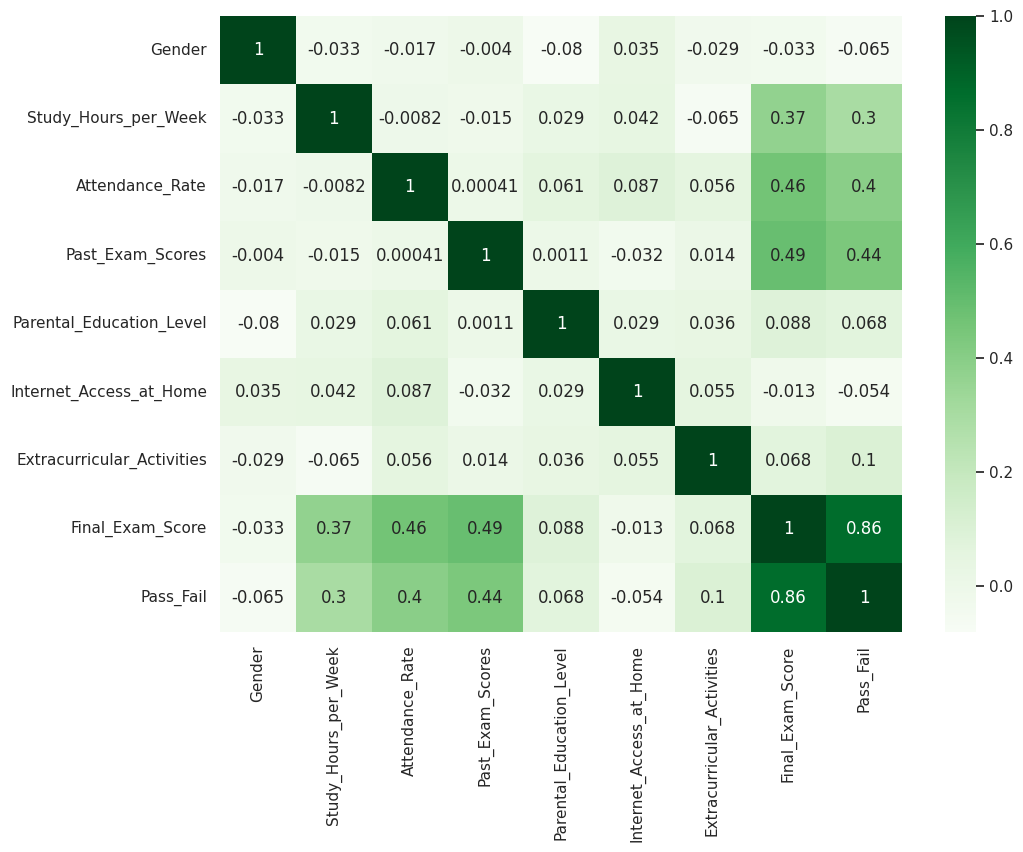

In [ ]:
#Correlation Matrix
corr = students.corr()

plt.figure(figsize=(11, 8))
sns.heatmap(corr, annot=True, cmap="Greens")
plt.show()

In [ ]:
#Split our Data
X = students.iloc[:, :-1]
Y = students.iloc[:, -1]

In [ ]:
X.shape

(708, 8)

In [ ]:
Y.shape

(708,)

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.15, random_state=5
)

In [ ]:
#Model Function
def model_function(model):
    model.fit(X_train, y_train)

    #Prediction
    pred = model.predict(X_test)

    #Accuracy of model
    accuracy = accuracy_score(y_test, pred)
    matrix = confusion_matrix(y_test, pred)

    print(accuracy)
    sns.heatmap(matrix, annot=True, cmap="Blues")

0.897196261682243


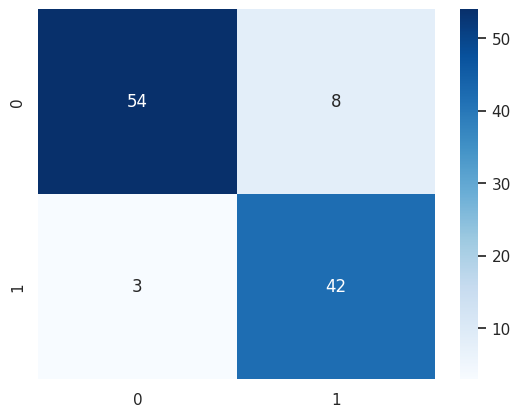

In [ ]:
#SVC
svc = SVC()
model_function(svc)

0.9252336448598131


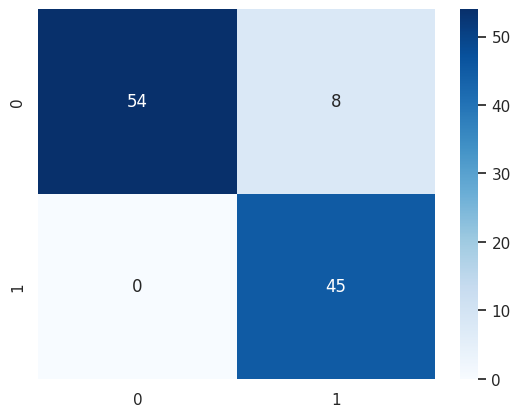

In [ ]:
#Linear SVC
linear = LinearSVC()
model_function(linear)

1.0


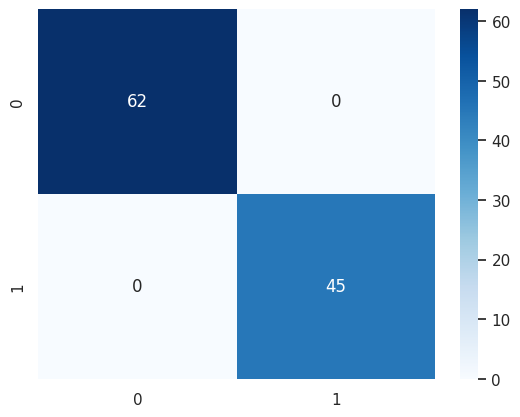

In [ ]:
#Forest
forest = RandomForestClassifier()
model_function(forest)

In [ ]:
#Save Our Model
import joblib

joblib.dump(forest, "student_score_chatGPT.joblib")

['student_score_chatGPT.joblib']